In [7]:
# This is a simple Data Analysis model that glace into the relationship between
# the sales of a video games between the North America and Globally.

# The Fisrt step is to include the libararies that ill be using for the data.
# Next I get the directory that that the data resides in and store it in a Dataframe. 

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

wrkdirect = os.getcwd()
print(wrkdirect)

path = wrkdirect + '/data/VGSALES_2.csv'

df = pd.read_csv(path)

In [10]:
df.head(5) # Fisrt 5 Rows of the Dataframe.

,RANK,NAME,PLATFORM,YEAR,GENRE,PUBLISHER,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,GLOBAL_SALES
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000,12880000,3790000,3310000,35820000
3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31370000


In [18]:
# Now that we viewd the dataframe, the next step is to modify the contents within the matrix.
# I transform the data in the Year column followed by transforming data in the Name, Platform, and Genre columns.

df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').fillna(0).astype(int) # Changes YEAR content from Float to Int
df.dtypes

numerized_data = df

for col_name in numerized_data.columns: 
    if(numerized_data[col_name].dtype == 'object'):
        numerized_data[col_name] = numerized_data[col_name].astype('category')
        numerized_data[col_name] = numerized_data[col_name].cat.codes

In [40]:
numerized_data.head(5) # shows the first 5 rows in the transformed matrix

,RANK,NAME,PLATFORM,YEAR,GENRE,PUBLISHER,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,GLOBAL_SALES
0,1.0,11007,26,2006,10,359,41490000,29020000,3770000,8460000,82740000
1,2.0,9327,11,1985,4,359,29080000,3580000,6810000,770000,40240000
2,3.0,5573,26,2008,6,359,15850000,12880000,3790000,3310000,35820000
3,4.0,11009,26,2009,10,359,15750000,11010000,3280000,2960000,33000000
4,5.0,7346,5,1996,7,359,11270000,8890000,10220000,1000000,31370000


<Axes: xlabel='GLOBAL_SALES', ylabel='NA_SALES'>

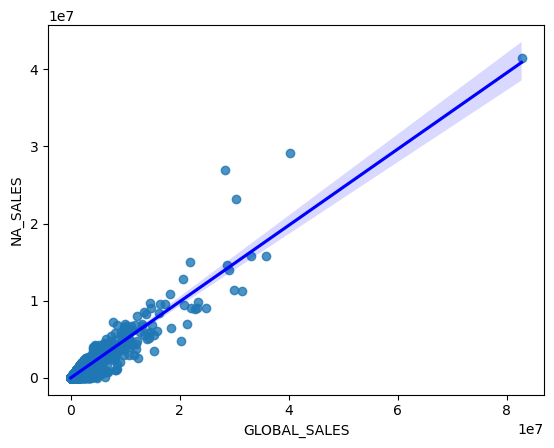

In [49]:
#plt.scatter(y=numerized_data['EU_SALES'], x=numerized_data['NA_SALES'])
sns.regplot(x='GLOBAL_SALES', y='NA_SALES', data=numerized_data, line_kws={"color":"blue"})


In [48]:
# Correlation between Dataframe columns
numerized_data.corr()

,RANK,NAME,PLATFORM,YEAR,GENRE,PUBLISHER,NA_SALES,EU_SALES,JP_SALES,OTHER_SALES,GLOBAL_SALES
RANK,1.000000,-0.014656,-0.083953,-0.008498,-0.053018,-0.021073,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
NAME,-0.014656,1.000000,0.776428,0.857955,0.727908,0.745552,0.270820,0.242651,0.217304,0.208909,0.285935
PLATFORM,-0.083953,0.776428,1.000000,0.885808,0.759424,0.759389,0.291158,0.267482,0.182076,0.242941,0.301688
YEAR,-0.008498,0.857955,0.885808,1.000000,0.834873,0.843487,0.304147,0.276090,0.242333,0.244548,0.323131
GENRE,-0.053018,0.727908,0.759424,0.834873,1.000000,0.704703,0.266785,0.241595,0.219651,0.211577,0.284272
PUBLISHER,-0.021073,0.745552,0.759389,0.843487,0.704703,1.000000,0.262977,0.242108,0.232850,0.216243,0.285530
NA_SALES,-0.401362,0.270820,0.291158,0.304147,0.266785,0.262977,1.000000,0.787033,0.489558,0.660866,0.946726
EU_SALES,-0.379123,0.242651,0.267482,0.276090,0.241595,0.242108,0.787033,1.000000,0.473105,0.744553,0.910427
JP_SALES,-0.267785,0.217304,0.182076,0.242333,0.219651,0.232850,0.489558,0.473105,1.000000,0.332304,0.640042
OTHER_SALES,-0.332986,0.208909,0.242941,0.244548,0.211577,0.216243,0.660866,0.744553,0.332304,1.000000,0.765784


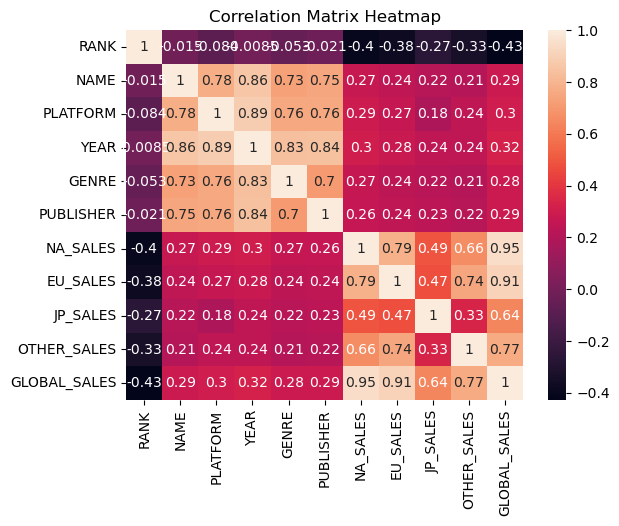

In [53]:
# To visualize the correlation between data, a heat map is used.

# By looking at the map one could deduce that the correlation between North America sales and Global sales 
# is significantly high at 98%

corr_matrix = numerized_data.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()